<a href="https://colab.research.google.com/github/koalalovepabro/Deep-Learning/blob/main/02_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 퍼셉트론이란?
* 인공 뉴런이라고도 한다.
* 뇌과학에서는 신경으로 들어오는 **일정한 자극**, 신경망에서는 **feature(특성)**가 된다.
* 입력된 신호(특성)는 어떠한 흐름을 타면서 처리가 된다.
* 처리가 완료가 되면 거기에 대한 결과가 퍼셉트론의 출력이 된다.
$$
y = \begin{cases} 
0 \enspace (w_1x_1 + w_2x_2 \leq \theta)
\\ 1 \enspace (w_1x_1 + w_2x_2 > \theta) \end{cases}
$$

$w_1x_1+w_2x_2$의 결괏값이 임의의 임계점 ($\theta$)를 넘지 못하면 0, 넘으면 1이 된다.

이러한 수식을 반응 조건 계산식 이라고 합니다.


In [ ]:
# 조건문을 써야 할까?
# 퍼셉트론의 w와 theta는 지금으로썬 알 수가 없다.
# 따라서 임의로 설정하기로 합니다.

def perceptron1(x1, x2):
  # 임의의 가중치인 w1, w2를 설정
  w1, w2 = 0.5, 0.5

  # 임의의 임계값인 theta를 설정
  theta = 2.0

  # 출력값 y 구하기
  y = w1*x1 + w2*x2

  return y, y >= theta

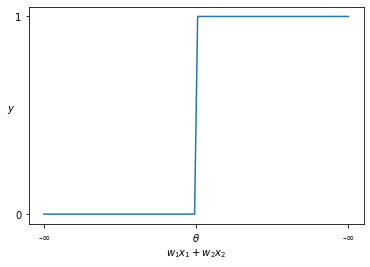

In [ ]:
# 시각화
# 입력 데이터 생성
x1 = np.linspace(-3, 7, 100)
x2 = np.linspace(-3, 7, 100)

# 퍼셉트론의 결과물 구하기
y_value, y_result = perceptron1(x1, x2)

# 시각화
plt.plot(y_value, y_result)
plt.yticks([0, 1])
plt.xticks([-3,2,7], [r'-$\infty$', r'$\theta$', r'-$\infty$'])
plt.xlabel(r"$w_1x_1+w_2x_2$")
plt.ylabel(r"$y$", rotation=0)
plt.show()

$\theta$를 기준으로 $w_1x_1+w_2x_2$의 결과가 0 또는 1로 결정지어진다. 이걸 함수로 일반화 시켜서 어떤 상황에서든 수식을 사용할 수 있도록 일반화 시켜보기

* 원래 수식
 * $
y = \begin{cases} 
0 \enspace (w_1x_1 + w_2x_2 \leq \theta)
\\ 1 \enspace (w_1x_1 + w_2x_2 > \theta) \end{cases}
$
* 바뀐 수식

 * $
y = \begin{cases} 
0 \enspace (w_1x_1 + w_2x_2 -\theta \leq 0)
\\ 1 \enspace (w_1x_1 + w_2x_2 -\theta > 0) \end{cases}
$
* 일반화된 함수 지정하기
 * $z = w_1x_1 + w_2x_2 -\theta$
 * $
y = \begin{cases} 
0 \enspace (z \leq 0)
\\ 1 \enspace (z > 0) \end{cases}
$
 * $
u(z) = \begin{cases} 
0 \enspace (z \leq 0)
\\ 1 \enspace (z > 0) \end{cases}
$
 * 함수$u$ 는 **단위 계단 함수**
 * $y=u(z)$

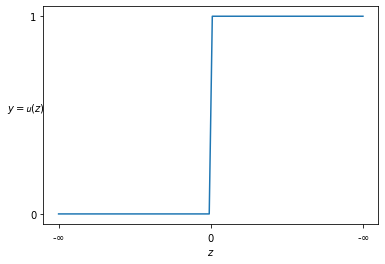

In [ ]:
z = np.linspace(-3, 3, 100)
plt.plot(z, z > 0)
plt.yticks([0, 1])
plt.xticks([-3, 0, 3],[r'-$\infty$', r'$0$', r'-$\infty$'])
plt.xlabel(r"$z$")
plt.ylabel(r"$y=\mathcal{u}(z)$", rotation=0)
plt.show()

* $
\\y = \mathcal{u}(w_1x_1 + w_2x_2 - \theta)  
$

* $
z = w_1x_1 + w_2x_2 - \theta
$

* $
y = u(z)
$

계단 함수 $u$의 결과($y$)에 따라서 항상 0 또는 1만 가지게 된다.

# 단층 퍼셉트론, 다층 퍼셉트론
* 단층 퍼셉트론의 한계
* 다층 퍼셉트론의 장점

## AND 게이트
* 입력값 두개가 모두 1이어야만 결과물이 1이 됩니다.


In [ ]:
def AND(x1, x2):
  # x1, x2에 대해서 조건 검사(if)를 하는 것은 퍼셉트론이 아니다.
  # w1x1+x2x2-theta의 결과물만 검사

  w1, w2, theta = 0.5, 0.5, 0.7
  z = w1*x1 + w2*x2 - theta

  return int(z > 0) # 부등호를 쓴 것이 계단함수 u를 사용한 것

AND(0, 0), AND(1, 0), AND(0, 1), AND(1, 1)

(0, 0, 0, 1)

### 편향(bias) 개념을 도입
수식에 음수가 있으면 표현하기 까다롭기 때문에 $\theta$를 $-b$로 표현

$$
y = \begin{cases} 
0 \enspace (w_1x_1 + w_2x_2 + b \leq  0)
\\
1 \enspace (w_1x_1 + w_2x_2 + b > 0)
\end{cases}
$$

퍼셉트론은 입력 신호에 가중치를 각각 곱한 값과 편향(bias)을 합하여 그 값이 0이 넘으면 1로, 0을 넘지 않으면 0으로 출력할 수 있도록 일반화

$$
z = \sum_{i=1}^{2}(w_ix_i)+b
$$

In [ ]:
# 입력이 몇개가 될지 모르기 때문에 numpy로 표현해 보자
x = np.array([0, 1])
w = np.array([0.5, 0.5]) # 항상 w의 개수는 x의 개수와 일치해야 합니다.
b = -0.7 # theta가 0.7이었으니까 bias 는 -0.7

print("행렬 곱 : {}".format(w*x))
print("각 원소의 곱을 합한 결과 : {}".format(np.sum(w*x)))
print("편항 추가 계산 : {:.1f}".format(np.sum(w*x) + b)) # WX+b

행렬 곱 : [0.  0.5]
각 원소의 곱을 합한 결과 : 0.5
편항 추가 계산 : -0.2


In [ ]:
# AND 게이트를 numpy로 구현
def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7

  z = np.sum(w*x) + b

  return int(z > 0)

AND(0, 0), AND(1, 0), AND(0, 1), AND(1, 1)

(0, 0, 0, 1)

### 가중치와 편항에 대한 의미
* 가중치 : 입력값에 대한 중요도
 - 각각의 입력값이 출력값에 얼마나 영향을 미치게 할 것인가?
   - 가중치가 크다 : 입력값이 출력값에 영향을 많이 미친다.
   - 가중치가 작다 : 입력값이 출력값에 영향을 많이 미치지 않는다.
* 편향 : 퍼셉트론이 얼마나 쉽게 활성화가 되는가를 결정해 준다.
 - 활성화 : 퍼셉트론의 결과물이 1이 되면 활성화가 됐다고 합니다.
 - 편향이 크면 퍼셉트론의 흥분도가 커져서 쉽게 활성화가 된다. (민감한 퍼셉트론)
 - 편향이 작으면 퍼셉트론의 흥분도가 낮아져서 활성화가 잘 안된다. (둔감한 퍼셉트론)

## NAND 게이트
 * AND 게이트의 부호를 반대로

In [ ]:
def NAND(x1, x2):
  x = np.array([x1, x2])
  # 가중치와 편향의 부호를 AND 게이트의 반대로 설정
  w = np.array([-0.5, -0.5])
  b = 0.7

  z = np.sum(w*x) + b

  return int(z > 0)

NAND(0, 0), NAND(1, 0), NAND(0, 1), NAND(1, 1)

(1, 1, 1, 0)

## OR 게이트
* AND 게이트의 편향을 적절하게 조절해 주면 된다.

In [ ]:
def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])

  # 편향만 조절해 준다.
  b = -0.2
  
  z = np.sum(w*x) + b

  return int( z > 0 )

OR(0, 0), OR(1, 0), OR(0, 1), OR(1, 1)

(0, 1, 1, 1)

AND, NAND, OR는 각각 하나의 퍼셉트로써 각자의 연산을 충실히 수행

각각의 입력값을 받아서 각자의 역할을 수행하면, 한번에 입력에 대한 한번의 출력이 올바르게 이루어 진다. -> **단층 퍼셉트론**

# 단층 퍼셉트론의 한계 - XOR 게이트 구현하기

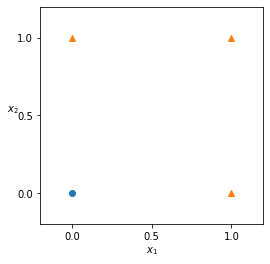

In [ ]:
# OR 퍼셉트론에 대한 시각화

plt.figure(figsize=(4,4))

plt.scatter([0],[0], marker='o')
plt.scatter([1,0,1],[0,1,1], marker='^')
plt.xticks([0, 0.5, 1])
plt.yticks([0, 0.5, 1])
plt.xlim((-0.2,1.2))
plt.ylim((-0.2,1.2))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$', rotation=0)

plt.show()

$$z=w_1x_1 + b$$

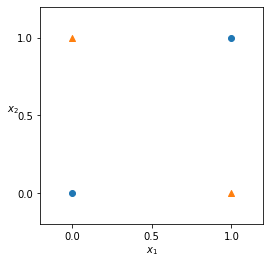

In [ ]:
# XOR 게이트 시각화
plt.figure(figsize=(4,4))

plt.scatter([0,1],[0,1], marker='o')
plt.scatter([1,0],[0,1], marker='^')
plt.xticks([0, 0.5, 1])
plt.yticks([0, 0.5, 1])
plt.xlim((-0.2,1.2))
plt.ylim((-0.2,1.2))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$', rotation=0)

plt.show()

## 단층 퍼셉트론을 여러개 쌓아서 해결하자
단층 퍼셉트론을 여러 개 쌓아서 다층 퍼셉트론으로 만들어 주면 단층 퍼셉트론으로는 해결할 수 없던 일을 해결 할 수 있다.

In [ ]:
# XOR 구현하기
def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)

  y = AND(s1, s2)

  return y

XOR(0, 0), XOR(1, 0), XOR(0, 1), XOR(1, 1)

(0, 1, 1, 0)